In [1]:
import math
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x0, x1 = -20, -3.1 # диапазон аргумента функции

test_data_size = 2000 # количество данных для итерации обучения
iterations = 30000 # количество итераций обучения
learn_rate = 0.01 # коэффициент переобучения

hiddenSize = 150 # размер скрытого слоя

In [3]:
def generate_test_values():
    train_x = []
    train_y = []

    for _ in range(test_data_size):
        x = x0+(x1 - x0)*np.random.rand()
        y = math.sin(2*x)/2*x # исследуемая функция
        train_x.append([x])
        train_y.append([y])

    return np.array(train_x), np.array(train_y)

C:\Users\Sergey\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
C:\Users\Sergey\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


cost = 0.09516197443008423
cost = 0.026992443948984146
cost = 0.024784153327345848
cost = 0.019355354830622673
cost = 0.025084642693400383
cost = 0.021125702187418938
cost = 0.011571785435080528
cost = 0.006757980212569237
cost = 0.005697368644177914
cost = 0.004010905046015978
cost = 0.005209913477301598
cost = 0.0030113044194877148
cost = 0.0033795556519180536
cost = 0.0029442112427204847
cost = 0.0025191029999405146
cost = 0.00927149597555399
cost = 0.005388808902353048
cost = 0.015265430323779583
cost = 0.00271756574511528
cost = 0.001191257033497095
cost = 0.0019711321219801903
cost = 0.001510784262791276
cost = 0.03110339120030403
cost = 0.0035264359321445227
cost = 0.002828590339049697
cost = 0.007839000783860683
cost = 0.07491810619831085
cost = 0.0007838815217837691
cost = 0.0009918780997395515
cost = 0.0023727379739284515


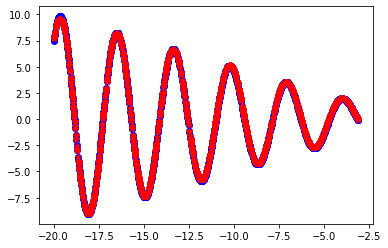

hidden:
kernel= [[1.2259169  1.042851   1.0540595  1.1729757  0.92666495 1.0271091
  1.017909   1.0647957  1.3636991  1.080418   1.1080501  2.8765867
  1.1172909  1.1399771  1.188775   1.0969971  1.0609131  1.0320581
  1.0583729  1.3532503  1.1606052  1.4511797  1.0088077  1.0435936
  1.0125866  1.0669575  1.1522504  1.0136645  0.99720675 1.2067728
  1.5231218  1.1530231  1.2034982  1.0611093  1.2474431  2.9566925
  0.9639189  1.1192244  0.92822355 1.1427968  1.0925395  1.1465338
  0.98750293 1.0003113  1.1499752  1.1430868  1.0745109  1.1312671
  1.1595324  1.0680332  1.2168213  1.8768923  1.0144206  1.2572266
  1.105352   1.0205973  1.040167   1.0182654  1.1707041  1.1010468
  1.1399605  1.092779   1.0828007  1.137422   1.0885562  1.7887967
  1.1601291  1.096149   1.3854587  1.0749683  1.0670784  1.1345646
  1.017419   1.1923403  1.3716183  1.2218732  1.0871229  1.1617463
  2.8996572  1.0579834  2.9153028  1.1210934  1.1196154  1.2800534
  1.2543342  0.98327553 0.98169553 1.2314745  

In [4]:
# узел на который будем подавать аргументы функции
x = tf.placeholder(tf.float32, [None, 1], name="x")

# узел на который будем подавать значения функции
y = tf.placeholder(tf.float32, [None, 1], name="y")

nn = tf.layers.dense(x, hiddenSize,
                     activation=tf.nn.tanh,
                     kernel_initializer=tf.initializers.ones(),
                     bias_initializer=tf.initializers.random_uniform(minval=-x1, maxval=-x0),
                     name="hidden")

# выходной слой
model = tf.layers.dense(nn, 1,
                        activation=None,
                        name="output")

# функция подсчёта ошибки
cost = tf.losses.mean_squared_error(y, model)

train = tf.train.AdamOptimizer(learn_rate).minimize(cost)

init = tf.initializers.global_variables()

with tf.Session() as session:
    session.run(init)

    for _ in range(iterations):

        train_dataset, train_values = generate_test_values()

        session.run(train, feed_dict={
            x: train_dataset,
            y: train_values
        })

        if(_ % 1000 == 999):
            print("cost = {}".format(session.run(cost, feed_dict={
                x: train_dataset,
                y: train_values
            })))

    train_dataset, train_values = generate_test_values()

    train_values1 = session.run(model, feed_dict={
        x: train_dataset,
    })

    plt.plot(train_dataset, train_values, "bo",
             train_dataset, train_values1, "r*")
    plt.show()

    with tf.variable_scope("hidden", reuse=True):
        w = tf.get_variable("kernel")
        b = tf.get_variable("bias")
        print("hidden:")
        print("kernel=", w.eval())
        print("bias = ", b.eval())

    with tf.variable_scope("output", reuse=True):
        w = tf.get_variable("kernel")
        b = tf.get_variable("bias")
        print("output:")
        print("kernel=", w.eval())
        print("bias = ", b.eval())